# ***DESAFIO START - REGRESSÃO LINEAR***

## Apresentação de desafio onde é necessário gerar modelos de regressão linear simples e múltpla, com objetivo de prever as vendas de casas. Deve ser avaliado também pontuação de cada modelo.

Dupla

Alisson Rafael - 

Lorena Silva - 


In [ ]:
#Importação das bibliotecas de uso durante a atividade.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn import metrics

In [ ]:
#Base de dados.

b_casas = pd.read_csv('/content/sample_data/Housing.csv')

In [ ]:
b_casas

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [ ]:
#mudandos os valores 'yes' = 1 e 'no'= 0 & furnishingstatus '0, 1, e 2 '.

b_casas.loc[b_casas.mainroad == 'yes','mainroad']= 1
b_casas.loc[b_casas.mainroad == 'no','mainroad']= 0
b_casas.loc[b_casas.guestroom == 'yes','guestroom']= 1
b_casas.loc[b_casas.guestroom == 'no','guestroom']= 0
b_casas.loc[b_casas.basement == 'yes','basement']= 1
b_casas.loc[b_casas.basement == 'no','basement']= 0
b_casas.loc[b_casas.hotwaterheating == 'yes','hotwaterheating']= 1
b_casas.loc[b_casas.hotwaterheating == 'no','hotwaterheating']= 0
b_casas.loc[b_casas.airconditioning == 'yes','airconditioning']= 1
b_casas.loc[b_casas.airconditioning == 'no','airconditioning']= 0
b_casas.loc[b_casas.prefarea == 'yes','prefarea']= 1
b_casas.loc[b_casas.prefarea == 'no','prefarea']= 0
b_casas.loc[b_casas.furnishingstatus == 'semi-furnished','furnishingstatus']= 2
b_casas.loc[b_casas.furnishingstatus == 'furnished','furnishingstatus']= 1
b_casas.loc[b_casas.furnishingstatus == 'unfurnished','furnishingstatus']= 0

In [ ]:
#Trocando os tipos de dados da base em uma nova variável.

b_casas1 = b_casas.astype({
    'mainroad':int,
    'guestroom':int,
    'basement':int,
    'hotwaterheating':int,
    'airconditioning':int,
    'prefarea':int,
    'furnishingstatus':int
})

In [ ]:
#Base com tipos alterados.

b_casas1

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,2
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,2
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,1


# **TESTE REGRESSÃO LINEAR SIMPLES - COLUNA PREÇO E COLUNA ÁREA**

In [ ]:
b_casas1.corr()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.296898,0.255517,0.187057,0.093073,0.452954,0.384394,0.329777,0.190086
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980,0.234779,0.081367
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,0.097834
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,0.089418
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,0.043288
mainroad,0.296898,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,0.079403
guestroom,0.255517,0.140297,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,0.057513
basement,0.187057,0.047417,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,0.093425
hotwaterheating,0.093073,-0.009229,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411,0.069076
airconditioning,0.452954,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382,0.020887


In [ ]:
#Teste com valor único - preenchendo variáveis.
a_unic = b_casas.iloc[:, 1:2].values

In [ ]:
b_unic = b_casas.iloc[:, 0].values

In [ ]:
#Importando train_test_split para criar modelo de treinamento e de teste com base nos dados

from sklearn.model_selection import train_test_split
a_treinamento, a_teste, b_treinamento, b_teste = train_test_split(a_unic, b_unic, test_size=0.3, random_state=101)

In [ ]:
a_treinamento.shape, b_treinamento.shape, a_teste.shape, b_teste.shape

((381, 1), (381,), (164, 1), (164,))

In [ ]:
#Aplicando o modelo de regressão linear nos modelos de treinamento/teste

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(a_treinamento, b_treinamento)

LinearRegression()

In [ ]:
regressor.intercept_

2250957.0972331674

In [ ]:
regressor.coef_

array([482.66635353])

In [ ]:
#Modelo de previsão.

previsor = regressor.predict(a_treinamento)

In [ ]:
#Grafico para exemplificar o modelo de previsão.

grafico1 = px.scatter(x = a_treinamento.ravel(), y = b_treinamento)
grafico2 = px.line(x = a_treinamento.ravel(), y = previsor)
grafico2.data[0].line.color = 'red'
grafico3 = go.Figure(data=grafico1.data + grafico2.data)
grafico3

# **MÉTRICAS DE ERRO**

In [ ]:
#Pontuação da base de treinamento.

regressor.score(a_treinamento, b_treinamento)

0.30197111526966625

In [ ]:
#Pontuação da base de testes.

regressor.score(a_teste, b_teste)

0.24385496968014964

In [ ]:
#Teste Mean Absolute Error

print('MAE', metrics.mean_absolute_error(a_treinamento, previsor))

MAE 4719249.372703412


In [ ]:
#Teste Mean Squared Error

print('MSE', metrics.mean_squared_error(a_treinamento, previsor))

MSE 23349321758186.562


In [ ]:
#Teste Root Mean Squared Error

print('RMSE', np.sqrt(metrics.mean_squared_error(a_treinamento, previsor)))

RMSE 4832113.591192426


# **REGRESSÃO LINEAR MÚLTIPLA**

In [ ]:
#Definição das variáveis.

a_multi = b_casas1.iloc[:, 1:]

In [ ]:
b_multi = b_casas1.iloc[:, 0]

In [ ]:
#Importando train_test_split para criar modelo de treinamento e de teste com base nos dados.

from sklearn.model_selection import train_test_split
a_multi_treinamento, a_multi_teste, b_multi_treinamento, b_multi_teste = train_test_split(a_multi, b_multi, test_size=0.3, random_state=101)

In [ ]:
a_multi_treinamento.shape, b_multi_treinamento.shape

((381, 12), (381,))

In [ ]:
#Aplicando o modelo de regressão linear nos modelos de treinamento/teste

from sklearn.linear_model import LinearRegression
regressor2 = LinearRegression()
regressor2.fit(a_multi_treinamento, b_multi_treinamento)

LinearRegression()

In [ ]:
regressor2.intercept_

-494914.48183860444

In [ ]:
regressor2.coef_

array([2.66058057e+02, 9.49677274e+04, 9.68151650e+05, 4.75641777e+05,
       4.51711439e+05, 7.00177573e+04, 4.25129579e+05, 1.00051272e+06,
       8.59533303e+05, 2.98057757e+05, 7.20133033e+05, 2.24049825e+05])

In [ ]:
previsor2 = regressor2.predict(a_multi_treinamento)

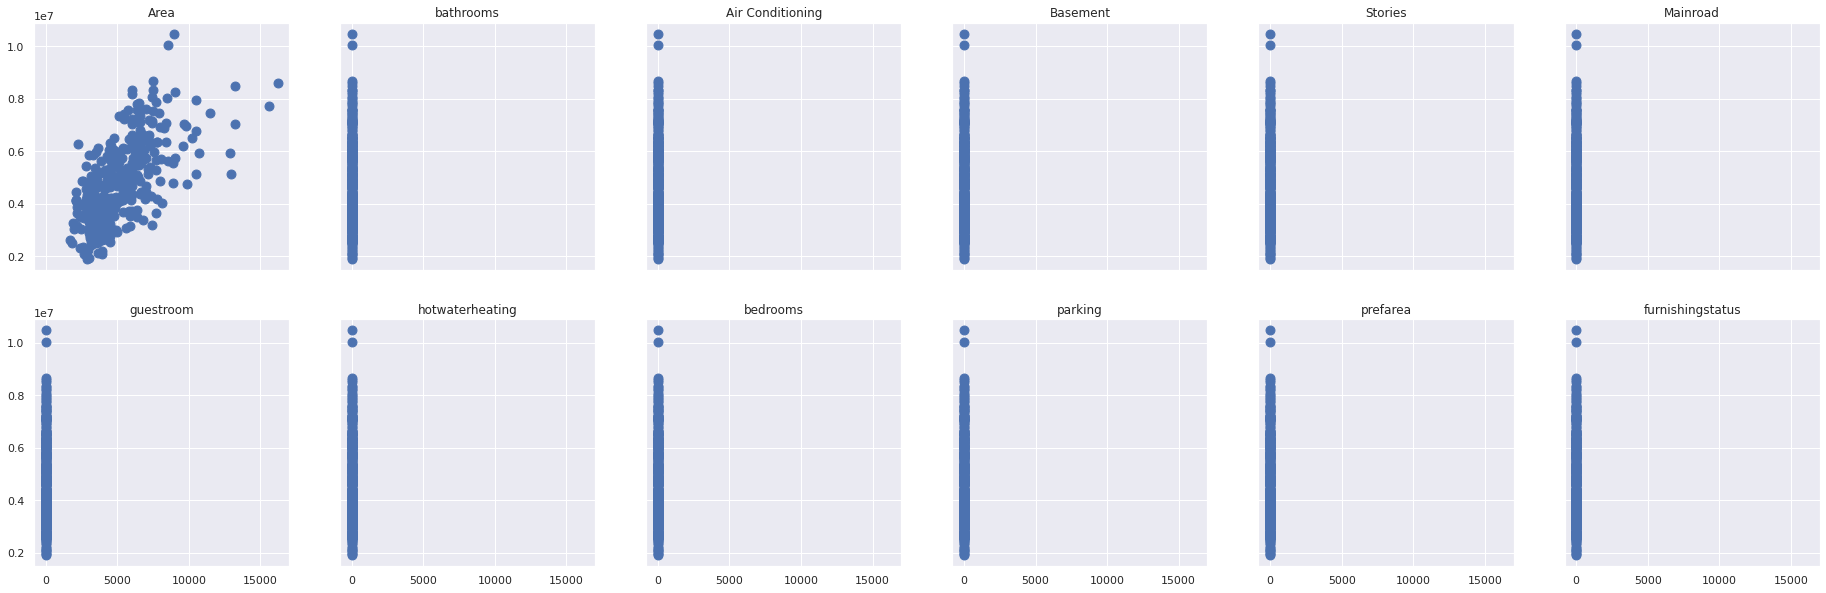

In [ ]:
#Grafico para exemplificar o teste.

# Fixing random state for reproducibility
np.random.seed(19680801)

#x = np.random.rand(10)
#y = np.random.rand(10)
#z = np.sqrt(x**2 + y**2)

fig, axs = plt.subplots(2, 6, figsize=(32, 10), sharex=True, sharey=True)

axs[0, 0].scatter(x=a_multi_treinamento['area'], y=previsor2, s=80)
axs[0, 0].set_title("Area")

axs[0, 1].scatter(x=a_multi_treinamento['bathrooms'], y=previsor2, s=80, vmin=0, vmax=1)
axs[0, 1].set_title(r"bathrooms")

axs[0, 2].scatter(x=a_multi_treinamento['airconditioning'], y=previsor2, s=80)
axs[0, 2].set_title("Air Conditioning")

axs[0, 3].scatter(x=a_multi_treinamento['basement'], y=previsor2, s=80)
axs[0, 3].set_title("Basement")

axs[0, 4].scatter(x=a_multi_treinamento['stories'], y=previsor2, s=80)
axs[0, 4].set_title("Stories")

axs[0, 5].scatter(x=a_multi_treinamento['mainroad'], y=previsor2, s=80)
axs[0, 5].set_title("Mainroad")

axs[1, 0].scatter(x=a_multi_treinamento['guestroom'], y=previsor2, s=80)
axs[1, 0].set_title("guestroom")

axs[1, 1].scatter(x=a_multi_treinamento['hotwaterheating'], y=previsor2, s=80)
axs[1, 1].set_title("hotwaterheating")

axs[1, 2].scatter(x=a_multi_treinamento['bedrooms'], y=previsor2, s=80)
axs[1, 2].set_title("bedrooms")

axs[1, 3].scatter(x=a_multi_treinamento['parking'], y=previsor2, s=80)
axs[1, 3].set_title("parking")

axs[1, 4].scatter(x=a_multi_treinamento['prefarea'], y=previsor2, s=80)
axs[1, 4].set_title("prefarea")

axs[1, 5].scatter(x=a_multi_treinamento['furnishingstatus'], y=previsor2, s=80)
axs[1, 5].set_title("furnishingstatus")

#plt.tight_layout()
plt.show()


In [ ]:
regressor2.score(a_multi_treinamento, b_multi_treinamento)

0.7012724258638082

In [ ]:
regressor2.score(a_multi_teste, b_multi_teste)

0.607705592937416

In [ ]:
#Teste Mean Absolute Error
print('MAE', metrics.mean_absolute_error(b_multi_treinamento, previsor2))

MAE 771368.3951502625


In [ ]:
#Teste Mean Squared Error

print('MSE', metrics.mean_squared_error(b_multi_treinamento, previsor2))

MSE 1070860668511.0243


In [ ]:
#Teste Root Mean Squared Error

print('RMSE', np.sqrt(metrics.mean_squared_error(b_multi_treinamento, previsor2)))

RMSE 1034823.9794820297


## **CONCLUSÃO**

Neste trabalho foi apresentado um conjunto de dados , com informações sobre casas a venda com o intuito de realizar um estudo de regressão linear para predizer o valor de venda de uma casa com base nessas informações.

Foi verificada uma correlação acima de 50% entre as colunas price e área, e após aplicarmos a regressão linear simples, e verificar as métricas de erro, pudemos concluir que esse modelo de regressão linear simples não tem uma boa previsão devido ao score baixo de 30% e também devido a correlação baixa.

Já pela mesma verificação de correlação das demais colunas com a coluna alvo “price”, observamos que outras variáveis também tinham uma correlação parecida, ou próxima de 50%, nesse caso fizemos a regressão múltipla, usando as 12 colunas restantes, e apesar do score da variável de treinamento ter melhorado significativamente em relação a regressão linear simples, ainda obtivemos um erro de r2 grande em relação ao valore real das casas.  

A regressão linear múltipla apresentou scores mais altos comparados a simples - 60% na base de testes e 70% na base de treinamento - indicando que uma maior disposição de dados melhora a porcentagem do algoritmo, sendo possível melhorar ainda mais o resultado com uma base de dados maior e com análise de correlação entre os dados.

Referências e links

https://scikit-learn.org/stable/modules/linear_model.html </br>
https://seaborn.pydata.org/examples/timeseries_facets.html </br>
https://pandas.pydata.org/docs/user_guide/index.html </br>
https://matplotlib.org/stable/index.html </br>
Curso - Udemy: Machine Learning e Data Science com Python de A a Z -Jones Granatyr </br>
Curso - Udemy: Python para Data Science e Machine Learning - Rodrigo Soares Tadewald </br>
